In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))

X_train: (60000, 28, 28), y_train: (60000,)
X_test: (10000, 28, 28), y_test: (10000,)


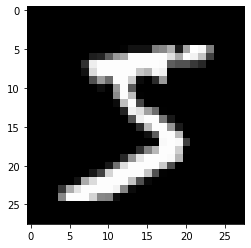

In [3]:
plt.imshow(X_train[0], cmap="gray")
plt.show()

In [4]:
X_train = X_train.reshape(X_train.shape[0], -1)/ 255
X_test = X_test.reshape(X_test.shape[0], -1)/ 255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

num_classes = y_test.shape[1]

print("X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))

X_train: (60000, 784), y_train: (60000, 10)
X_test: (10000, 784), y_test: (10000, 10)


In [5]:
def create_model(dropout_rate=0.0):
    if(dropout_rate > 0.0):
        model = keras.Sequential([
            Dense(512),
            Dropout(rate=dropout_rate),
            Dense(256),
            Dropout(rate=dropout_rate),
            Dense(128),
            Dropout(rate=dropout_rate),
            Dense(num_classes, activation="softmax")
        ])
    else:
        model = keras.Sequential([
            Dense(512),
            Dense(256),
            Dense(128),
            Dense(num_classes, activation="softmax")
        ])
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [6]:
model_dropout = create_model(dropout_rate=0.5)
hist_dropout = model_dropout.fit(X_train, y_train, 
                                 validation_data=(X_test, y_test), 
                                 epochs=20, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/sample - loss: 1.3894 - accuracy: 0.5548 - val_loss: 0.4822 - val_accuracy: 0.8653
Epoch 2/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.7837 - accuracy: 0.7493 - val_loss: 0.3903 - val_accuracy: 0.8881
Epoch 3/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.6760 - accuracy: 0.7885 - val_loss: 0.3617 - val_accuracy: 0.8947
Epoch 4/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.6200 - accuracy: 0.8094 - val_loss: 0.3463 - val_accuracy: 0.8995
Epoch 5/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.5863 - accuracy: 0.8211 - val_loss: 0.3383 - val_accuracy: 0.9007
Epoch 6/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.5653 - accuracy: 0.8288 - val_loss: 0.3303 - val_accuracy: 0.9031
Epoch 7/20
60000/60000 [==============================] 

In [10]:
model_dropout.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  401920    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  131328    
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  32896     
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  1

In [7]:
model = create_model()
hist = model.fit(X_train, y_train,
                 validation_data=(X_test, y_test), 
                 epochs=20, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.8577 - accuracy: 0.7716 - val_loss: 0.4691 - val_accuracy: 0.8768
Epoch 2/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4349 - accuracy: 0.8806 - val_loss: 0.3753 - val_accuracy: 0.8962
Epoch 3/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3757 - accuracy: 0.8947 - val_loss: 0.3445 - val_accuracy: 0.9033
Epoch 4/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3496 - accuracy: 0.9018 - val_loss: 0.3248 - val_accuracy: 0.9084
Epoch 5/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3339 - accuracy: 0.9055 - val_loss: 0.3147 - val_accuracy: 0.9092
Epoch 6/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3231 - accuracy: 0.9085 - val_loss: 0.3071 - val_accuracy: 0.9109
Epoch 7/20
60000/60000 [==============================] 

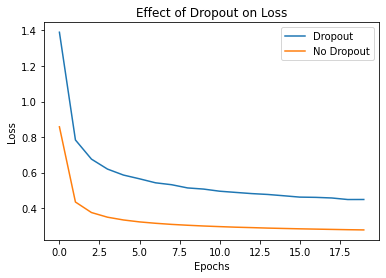

In [8]:
plt.plot(hist_dropout.history['loss'], label="Dropout")
plt.plot(hist.history['loss'], label="No Dropout")
plt.title("Effect of Dropout on Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(loc="best")
plt.show()

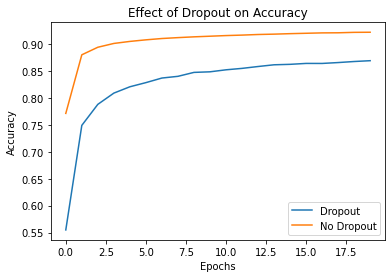

In [9]:
plt.plot(hist_dropout.history['accuracy'], label="Dropout")
plt.plot(hist.history['accuracy'], label="No Dropout")
plt.title("Effect of Dropout on Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(loc="best")
plt.show()